# This sorts the bike data into zip codes of origin and destination

In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
#reads in zipcode boundary geojson file
zipcodes = gpd.read_file('data/Chicago/Boundaries - ZIP Codes.geojson') 
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


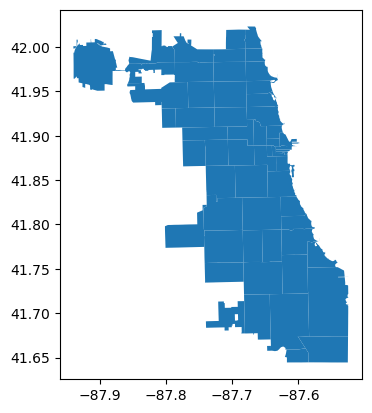

In [3]:
zipcodes.plot();

In [4]:
#drops unneeded zipcode columns
zipcodes = zipcodes[['zip', 'geometry']]

In [5]:
#reads in bike data
bikes_from = pd.read_csv('data/Chicago/cleaned/bikes/bikes_clean_m12.csv')
print(bikes_from.shape)
bikes_from.head(3)

(128354, 16)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_dt,end_dt,duration
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,2022-12-05 10:47:18,2022-12-05 10:56:34,556.0
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,2022-12-18 06:42:33,2022-12-18 07:08:44,1571.0
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,2022-12-13 08:47:45,2022-12-13 08:59:51,726.0


In [6]:
#renames columns
bikes_from = bikes_from.rename(columns={"start_lat": "lat", "start_lng": "lng"})
bikes_from

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,lat,lng,end_lat,end_lng,member_casual,start_dt,end_dt,duration
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,2022-12-05 10:47:18,2022-12-05 10:56:34,556.0
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,2022-12-18 06:42:33,2022-12-18 07:08:44,1571.0
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,2022-12-13 08:47:45,2022-12-13 08:59:51,726.0
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member,2022-12-13 18:50:47,2022-12-13 19:19:48,1741.0
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual,2022-12-14 16:13:39,2022-12-14 16:27:50,851.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128349,856E6CB8A83DAE6A,electric_bike,2022-12-29 17:31:30,2022-12-29 17:52:58,California Ave & Fletcher St,15642,Green St & Madison St,TA1307000120,41.938516,-87.698171,41.881859,-87.649264,casual,2022-12-29 17:31:30,2022-12-29 17:52:58,1288.0
128350,EB7999FF9DBC0535,electric_bike,2022-12-21 19:08:04,2022-12-21 19:17:14,Michigan Ave & Washington St,13001,Peoria St & Jackson Blvd,13158,41.884161,-87.624459,41.877642,-87.649618,member,2022-12-21 19:08:04,2022-12-21 19:17:14,550.0
128351,05AD87788BCBF206,electric_bike,2022-12-06 17:08:45,2022-12-06 17:14:43,Wells St & Hubbard St,TA1307000151,Green St & Madison St,TA1307000120,41.890018,-87.634520,41.881859,-87.649264,member,2022-12-06 17:08:45,2022-12-06 17:14:43,358.0
128352,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,2022-12-14 17:06:28,2022-12-14 17:19:27,779.0


In [7]:
#created column containing geopoints
bikes_from['from_geo'] = bikes_from.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
bikes_from.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,lat,lng,end_lat,end_lng,member_casual,start_dt,end_dt,duration,from_geo
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,2022-12-05 10:47:18,2022-12-05 10:56:34,556.0,POINT (-87.65711466666667 41.9182435)
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,2022-12-18 06:42:33,2022-12-18 07:08:44,1571.0,POINT (-87.64545099999999 41.940106)
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,2022-12-13 08:47:45,2022-12-13 08:59:51,726.0,POINT (-87.65113318 41.885918856)


In [8]:
#drops unneeded columns
bikes_from_geo = bikes_from[['ride_id', 'from_geo']]
bikes_from_geo

,ride_id,from_geo
0,65DBD2F447EC51C2,POINT (-87.65711466666667 41.9182435)
1,0C201AA7EA0EA1AD,POINT (-87.64545099999999 41.940106)
2,E0B148CCB358A49D,POINT (-87.65113318 41.885918856)
3,54C5775D2B7C9188,POINT (-87.635406 41.838464)
4,A4891F78776D35DF,POINT (-87.6677280664444 41.89595435734305)
...,...,...
128349,856E6CB8A83DAE6A,POINT (-87.69817137699999 41.938516378)
128350,EB7999FF9DBC0535,POINT (-87.624459028 41.884161472)
128351,05AD87788BCBF206,POINT (-87.634519815 41.890018225)
128352,F041C89A3D1F0270,POINT (-87.714018822 41.949979544)


In [9]:
#creates geodataframe from bike info
bikes_from_geo = gpd.GeoDataFrame(bikes_from_geo, 
                           crs = zipcodes.crs, 
                           geometry = bikes_from['from_geo'])

In [10]:
#sorts origin bike info into zipcodes
from_by_zip = gpd.sjoin(bikes_from_geo, zipcodes, op = 'within')
from_by_zip = from_by_zip.rename(columns={'geometry': 'zip_geo', "zip": "from_zip"})
from_by_zip.head()

,ride_id,from_geo,zip_geo,index_right,from_zip
0,65DBD2F447EC51C2,POINT (-87.65711466666667 41.9182435),POINT (-87.65711 41.91824),15,60614
9,8DDBAE51E55DAEEF,POINT (-87.6658 41.92533),POINT (-87.66580 41.92533),15,60614
16,46FD5C26A4020ED1,POINT (-87.638677 41.911386),POINT (-87.63868 41.91139),15,60614
19,FF9A7FC5BCB6D029,POINT (-87.638651967 41.911387205),POINT (-87.63865 41.91139),15,60614
20,1B2898656A62F1FB,POINT (-87.65706157699999 41.918221354),POINT (-87.65706 41.91822),15,60614


In [11]:
from_by_zip.from_zip.value_counts()

60614    12795
60610     8218
60607     8020
60611     7893
60657     7295
60654     6959
60613     6383
60622     5941
60661     5899
60605     5683
60647     4872
60642     4615
60616     4010
60640     3639
60601     3583
60606     3330
60612     3200
60618     2936
60603     2254
60637     2233
60608     2107
60625     1883
60602     1853
60604     1584
60615     1544
60660     1233
60626     1168
60639      696
60609      695
60641      537
60653      484
60651      339
60629      333
60632      311
60645      304
60623      283
60659      260
60628      226
60624      204
60643      192
60634      180
60649      172
60619      154
60621      122
60707      109
60617      105
60620       99
60630       92
60644       71
60636       44
60655       33
60633       32
60638       13
60827        4
Name: from_zip, dtype: int64

### The following repeats the same process for destination data

In [12]:
bikes_to = pd.read_csv('data/Chicago/cleaned/bikes/bikes_clean_m12.csv')
print(bikes_to.shape)
bikes_to.head(3)

(128354, 16)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_dt,end_dt,duration
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,2022-12-05 10:47:18,2022-12-05 10:56:34,556.0
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,2022-12-18 06:42:33,2022-12-18 07:08:44,1571.0
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,2022-12-13 08:47:45,2022-12-13 08:59:51,726.0


In [13]:
bikes_to = bikes_to.rename(columns={"end_lat": "lat", "end_lng": "lng"})

In [14]:
bikes_to['to_geo'] = bikes_to.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)

In [15]:
bikes_to_geo = bikes_to[['ride_id', 'to_geo']]

In [16]:
bikes_to_geo = gpd.GeoDataFrame(bikes_to_geo, 
                           crs = zipcodes.crs, 
                           geometry = bikes_to['to_geo'])

In [17]:
to_by_zip = gpd.sjoin(bikes_to_geo, zipcodes, op = 'within')
to_by_zip = to_by_zip.rename(columns={'geometry': 'zip_geo', "zip": "to_zip"})
to_by_zip.head()

,ride_id,to_geo,zip_geo,index_right,to_zip
0,65DBD2F447EC51C2,POINT (-87.63888799999999 41.922167),POINT (-87.63889 41.92217),15,60614
1,0C201AA7EA0EA1AD,POINT (-87.63888799999999 41.922167),POINT (-87.63889 41.92217),15,60614
116,785E4A274F1954CA,POINT (-87.63888799999999 41.922167),POINT (-87.63889 41.92217),15,60614
118,66EDCC657C1E3D41,POINT (-87.63888799999999 41.922167),POINT (-87.63889 41.92217),15,60614
119,241F6DAF109D0941,POINT (-87.63888799999999 41.922167),POINT (-87.63889 41.92217),15,60614


### Next, the origin and destination datasets will be merged and filtered for trips between different zip codes

In [18]:
trips_by_zip = from_by_zip.merge(to_by_zip, left_on='ride_id', right_on='ride_id')

In [19]:
trips_by_zip = trips_by_zip[['ride_id', 'from_zip', 'to_zip']]
trips_by_zip

,ride_id,from_zip,to_zip
0,65DBD2F447EC51C2,60614,60614
1,8DDBAE51E55DAEEF,60614,60613
2,46FD5C26A4020ED1,60614,60611
3,FF9A7FC5BCB6D029,60614,60606
4,1B2898656A62F1FB,60614,60647
...,...,...,...
126780,61E99012926AC762,60630,60630
126781,DA8B58D313D1AD93,60630,60626
126782,11CF36728228E03E,60827,60827
126783,5BFB61DE88175759,60827,60628


In [20]:
#displays how many trips stay in the same zipcode
trips_by_zip.loc[trips_by_zip.from_zip == trips_by_zip.to_zip] 

,ride_id,from_zip,to_zip
0,65DBD2F447EC51C2,60614,60614
13,785E4A274F1954CA,60614,60614
14,241F6DAF109D0941,60614,60614
15,27307451BD4D8F44,60614,60614
16,70E5A6BDE361E069,60614,60614
...,...,...,...
126759,A987B5136D3B2D71,60630,60630
126761,67402A2814355107,60630,60630
126770,BE79C5919D5093F3,60630,60630
126780,61E99012926AC762,60630,60630


In [21]:
#save the trips that arebetween zip codes
diff = trips_by_zip.loc[trips_by_zip.from_zip != trips_by_zip.to_zip] 

In [22]:
#counts the number of trips between each pair of zip codes
trip_count = diff[['from_zip', 'to_zip']].value_counts().reset_index(name='count')
trip_count

,from_zip,to_zip,count
0,60657,60614,1920
1,60614,60657,1849
2,60613,60657,1597
3,60657,60613,1588
4,60610,60614,1472
...,...,...,...
1102,60653,60642,1
1103,60626,60631,1
1104,60626,60622,1
1105,60626,60611,1


In [23]:
trip_count.to_csv('data/Chicago/cleaned/bikes/bikes_count_m12.csv', index=False)

In [24]:
trip_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   from_zip  1107 non-null   object
 1   to_zip    1107 non-null   object
 2   count     1107 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 26.1+ KB
